Clustering Analysis

Dr. Shen-Shyang Ho

November 14, 2022

• In this assignment, you will be using the dataset assigned to you in Assignment 1.

• We will reuse the histogram representation for images you have created in Assignment 2 for clustering. Use only the images/histogram for the four weed classes and ignore the negative class images.

• The labels will be used as ground truths for performance evaluation when we use external performance measure.

• You will use the following clustering methods: K-means, Spectral Clustering, Hierarchical Clustering, DBSCAN, Bisecting K-means

• Scikit-learn (https://scikit-learn.org/stable/user guide.html) will be used in this assignment.

• In particular, most important coding information should be available in https://scikit-learn.org/stable/ modules/clustering.html

1. Convert the images from the four weed classes (ignoring the negative class images) to grayscale pixel intensity histograms. (You should have done this in Assignment 2) and normalize the histogram dataset.

2. [K-means Clustering and its variants] Using 𝐾 = 4, we will investigate the behavior of the K-means, bisecting K-means, and spectral clustering algorithm.

(a) Perform 50 trials for K-mean clustering (Use KMeans with init = ‘Random’) using different random initial centroids on your assigned dataset.

(b) Perform clustering performance evaluation using Fowlkes-Mallows index (sklearn.metrics.fowlkes mallows score). Compute the Fowlkes-Mallows index for each trial. Plot a histogram with 10 equal bins (for range of [0,1]) showing the distribution of the Fowlkes-Mallows index for the 50 trials.

(c) Perform clustering performance evaluation using Silhouette Coefficient (sklearn.metrics.silhouette score). Compute the Silhouette Coefficient for each trial. Plot a histogram with 10 equal bins (for range of [-1,1]) showing the distribution of the Silhouette Coefficient for the 50 trials.

(d) Repeat Step (a)-(c) for (1) KMeans with init=‘k-means++’, (2) bisecting K-means (sklearn.cluster. BisectingKMeans with init = ‘Random’ and all other parameters to be default), and (3) spectral clustering (sklearn.cluster.SpectralClustering with default parameters) (4 points - 1 point for each method)

(e) What is the Fowlkes-Mallows index? What is the main difference between Fowlkes-Mallows index and Silhouette Coefficient? (0.5 point)

(f) Computer the average Fowlkes-Mallows index using the values you obtained in (b) for each method. Which one performs the best? (0.5 point)

(g) Computer the average Silhouette Coefficient using the values you obtained in (c) for each method. Which one performs the best? Is it consistent with the result you obtain in (f)? Explain your observation. (0.5 point)

3. [Model Selection Process for Clustering Task] Perform model selection for the k-mean clustering algorithm (Use KMeans with init = ‘Random’) using 𝐾 = 2, 3, 4, 5, 6, 7, 8 and using the average Silhouette Coefficient (similar steps as Question 2(c) and 2(g)) as clustering performance evaluation. Again, to obtain the average Silhouette Coefficient, perform 50 trials for each 𝐾. (1 point)

(a) Plot a graph with 𝐾 as the x-axis and average Silhouette Coefficient as the y-axis. (0.25 point)

(b) What is the best 𝐾 to use for your dataset based on the plotted graph? (0.25 point)

4. [Density-based Clustering] Perform dimension reduction on your histogram dataset to reduce the dimension to 2 (similar to Assignment 1 Question 2(e)). Perform DBSCAN on the 2D dataset to obtain 4 to 10 clusters. (1 point)

(a) How many clusters did you obtain? What is the Silhouette Coefficient for the clustering you obtain? What are the eps and min samples parameter values you used to get your clustering? (0.25 point)

(b) Plot your clustering result similar to the one shown in https://scikit-learn.org/stable/auto examples/cluster/ plot dbscan.html #sphx-glr-auto-examples-cluster-plot-dbscan-py (0.25 point)

5. [Hierarchical Clustering] We will investigate the four different strategies: Single (MIN), Complete (MAX), Average, and Ward, for agglomerative clustering (i.e., hierarchical clustering) we learned in the lecture using sklearn.cluster.AgglomerativeClustering with number of clusters set to 4 using the 2D dataset constructed in Question 4.

(a) Use the four linkage values ‘ward’, ‘complete’, ‘average’, ‘single’ for sklearn.cluster. AgglomerativeClustering to construct 4 clusterings. (1 point)

(b) What are the Silhouette Coefficients for each clustering in (a)? Based on the Silhouette Coefficients, which strategy performs the best? (0.25 point)

(c) Plot the four clustering results (separately and label them clearly in your submission) similar to the one in 4(b) (but no noise point). Based on your observation of the plots, which strategy performs the best? Is it consistent with the result you obtain in (b)? (0.25 point)


In [1]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import fowlkes_mallows_score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from yellowbrick.cluster import KElbowVisualizer
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
from statistics import mean

In [2]:
def grey_scale(img):
    (row, col) = img.shape[0:2]
 
    for i in range(row):
        for j in range(col):
            # Find the average of the BGR pixel values
            img[i, j] = sum(img[i, j]) * 0.33
            
    return img

In [3]:
df_file = pd.read_csv("C:/Users/SHARMISHA/Desktop/Data Mining -1/Programming Assignment 1/Weed-4class-67/Weed-4class-67-labels.csv")

In [4]:
df_file

,Filename,Label,Species
0,20161207-112417-0.jpg,8,Negative
1,20161207-112431-0.jpg,8,Negative
2,20161207-112802-0.jpg,8,Negative
3,20161207-112812-0.jpg,8,Negative
4,20170128-101909-0.jpg,8,Negative
...,...,...,...
13277,20171102-123535-3.jpg,2,Parkinsonia
13278,20171102-123549-2.jpg,2,Parkinsonia
13279,20171102-123554-3.jpg,2,Parkinsonia
13280,20171102-123606-2.jpg,2,Parkinsonia


In [5]:
def grey_img(img):
    source = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return source

def hist_vector(img):
    image = cv2.imread(r"C:/Users/SHARMISHA/Desktop/Data Mining -1/Programming Assignment 1/Weed-4class-67/{}".format(img))
    gray_image1 = grey_img(image)
    hist,bins = np.histogram(gray_image1.flatten(),256,[0,256])
    return hist

vectors = []

for file in df_file['Filename']:
    vectors.append(hist_vector(file))

In [6]:
df_vec = pd.DataFrame(vectors, columns= range(0,256))
df_vec["label"] = df_file["Species"]
df_vec.to_csv("file1.csv")
df_vec = pd.read_csv("file1.csv")
df_vec

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,247,248,249,250,251,252,253,254,255,label
0,0,158,480,427,278,334,339,385,476,474,...,49,38,60,70,78,69,149,119,3,Negative
1,1,315,422,254,231,237,278,359,387,466,...,41,46,48,50,64,53,90,185,23,Negative
2,2,26,104,114,76,99,94,126,178,169,...,66,84,80,91,125,135,183,221,42,Negative
3,3,35,135,129,94,177,125,176,192,241,...,58,85,69,99,107,154,185,189,46,Negative
4,4,0,0,0,1,3,3,4,8,15,...,72,69,24,18,8,3,0,0,0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13277,13277,3,12,10,12,22,17,25,38,57,...,326,291,393,454,606,705,1172,1989,592,Parkinsonia
13278,13278,7,37,64,40,109,124,144,133,190,...,87,106,113,126,112,162,134,115,27,Parkinsonia
13279,13279,57,163,116,105,127,132,180,171,207,...,77,62,87,82,94,51,67,29,7,Parkinsonia
13280,13280,56,176,118,98,123,146,166,204,239,...,16,19,28,30,34,21,36,111,68,Parkinsonia


In [7]:
df_vec = df_vec[df_vec.label!="Negative"]
df_vec.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,247,248,249,250,251,252,253,254,255,label
9106,9106,0,1,11,20,27,28,32,35,38,...,71,44,70,62,53,41,27,22,2,Siam weed
9107,9107,3,7,10,10,15,16,17,13,16,...,58,47,54,52,63,60,130,234,67,Siam weed
9108,9108,5,7,4,5,15,11,16,14,17,...,226,279,245,286,319,401,638,809,174,Siam weed
9109,9109,1,4,10,6,9,6,8,12,11,...,65,78,57,60,132,125,192,101,21,Siam weed
9110,9110,7,9,11,4,8,11,13,17,15,...,31,45,43,57,77,56,136,139,50,Siam weed


In [8]:
df_vec.shape

(4176, 258)

In [9]:
df_vec.drop(columns=["Unnamed: 0", 'label'], inplace=True)
df_vec.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
9106,0,1,11,20,27,28,32,35,38,55,...,64,71,44,70,62,53,41,27,22,2
9107,3,7,10,10,15,16,17,13,16,24,...,44,58,47,54,52,63,60,130,234,67
9108,5,7,4,5,15,11,16,14,17,16,...,218,226,279,245,286,319,401,638,809,174
9109,1,4,10,6,9,6,8,12,11,8,...,58,65,78,57,60,132,125,192,101,21
9110,7,9,11,4,8,11,13,17,15,15,...,45,31,45,43,57,77,56,136,139,50


In [10]:
df_file = df_file[df_file.Species!="Negative"]
df_file.shape

(4176, 3)

In [11]:
df_vec

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
9106,0,1,11,20,27,28,32,35,38,55,...,64,71,44,70,62,53,41,27,22,2
9107,3,7,10,10,15,16,17,13,16,24,...,44,58,47,54,52,63,60,130,234,67
9108,5,7,4,5,15,11,16,14,17,16,...,218,226,279,245,286,319,401,638,809,174
9109,1,4,10,6,9,6,8,12,11,8,...,58,65,78,57,60,132,125,192,101,21
9110,7,9,11,4,8,11,13,17,15,15,...,45,31,45,43,57,77,56,136,139,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13277,3,12,10,12,22,17,25,38,57,92,...,276,326,291,393,454,606,705,1172,1989,592
13278,7,37,64,40,109,124,144,133,190,206,...,75,87,106,113,126,112,162,134,115,27
13279,57,163,116,105,127,132,180,171,207,214,...,49,77,62,87,82,94,51,67,29,7
13280,56,176,118,98,123,146,166,204,239,297,...,26,16,19,28,30,34,21,36,111,68


In [12]:
label= df_file["Species"].tolist()

2. [K-means Clustering and its variants] Using 𝐾 = 4, we will investigate the behavior of the K-means,
bisecting K-means, and spectral clustering algorithm.
(a) Perform 50 trials for K-mean clustering (Use KMeans with init = ‘Random’) using different random
initial centroids on your assigned dataset.
(b) Perform clustering performance evaluation using Fowlkes-Mallows index (sklearn.metrics.fowlkes
mallows score). Compute the Fowlkes-Mallows index for each trial. Plot a histogram with 10 equal
bins (for range of [0,1]) showing the distribution of the Fowlkes-Mallows index for the 50 trials.

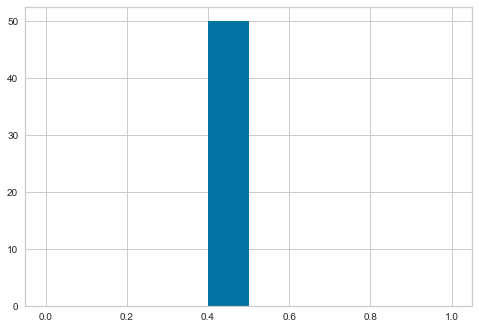

In [13]:
fowlkes_mallows_scores= [] 
for i in range(50):  
    kmeans = KMeans(n_clusters=4, init='random', random_state= i)  
    kmeans.fit(df_vec)
    y = kmeans.predict(df_vec)
    fowlkes_mallows_scores.append(fowlkes_mallows_score(label, y)) 
plt.hist(fowlkes_mallows_scores,bins=10,range=[0,1])  
plt.show()

(c) Perform clustering performance evaluation using Silhouette Coefficient (sklearn.metrics.silhouette score).
Compute the Silhouette Coefficient for each trial. Plot a histogram with 10 equal bins (for range of
[-1,1]) showing the distribution of the Silhouette Coefficient for the 50 trials.

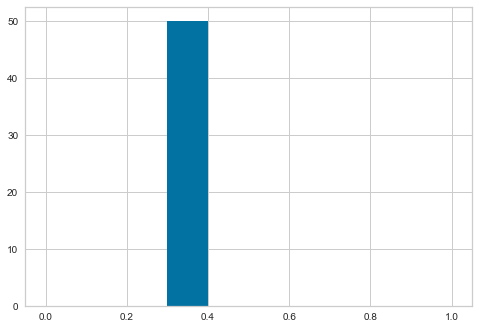

In [14]:
silhouette_scores= [] 
for i in range(50):  
    kmeans = KMeans(n_clusters=4, init='random',random_state= i)  
    kmeans.fit(df_vec)
    y = kmeans.predict(df_vec)
    silhouette_scores.append(silhouette_score(df_vec, y))
plt.hist(silhouette_scores,bins=10,range=[0,1])  
plt.show()

In [15]:
print(mean(fowlkes_mallows_scores))
print(mean(silhouette_scores))

0.4719368037410392
0.312898495240303


(d) Repeat Step (a)-(c) for (1) KMeans with init=‘k-means++’, (2) bisecting K-means (sklearn.cluster.
BisectingKMeans with init = ‘Random’ and all other parameters to be default), and (3) spectral
clustering (sklearn.cluster.SpectralClustering with default parameters) (4 points - 1 point for each
method)

0.4721078008444241
0.31353844687218396


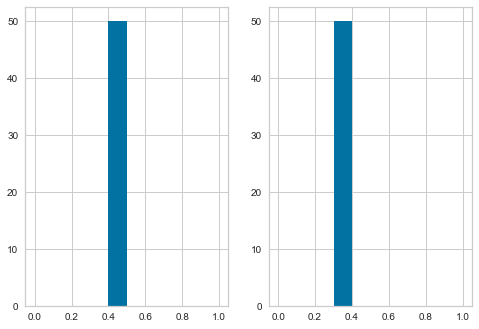

In [16]:
silhouette_scores= []
fowlkes_mallows_scores= []
for i in range(50):  
    kmeans = KMeans(n_clusters=4, init='k-means++', random_state= i)  
    kmeans.fit(df_vec)
    y = kmeans.predict(df_vec)
    fowlkes_mallows_scores.append(fowlkes_mallows_score(label, y))
    silhouette_scores.append(silhouette_score(df_vec, y))
print(mean(fowlkes_mallows_scores))
print(mean(silhouette_scores))
plt.subplot(1, 2, 1)
plt.hist(fowlkes_mallows_scores,bins=10,range=[0,1])
plt.subplot(1, 2, 2)
plt.hist(silhouette_scores,bins=10,range=[0,1])
plt.show()

0.29859759914270145
-0.01675644325902695


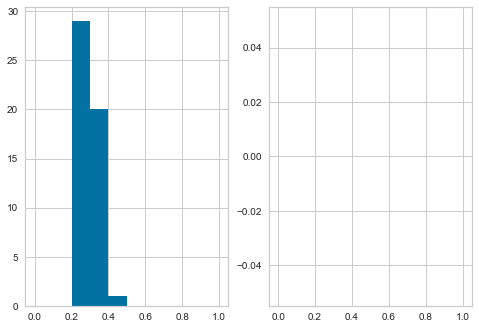

In [17]:
silhouette_scores= []
fowlkes_mallows_scores= []
for i in range(50):  
    spectral_model_rbf = SpectralClustering(n_clusters = 4, affinity ='rbf')  
    y = spectral_model_rbf.fit_predict(df_vec)
    fowlkes_mallows_scores.append(fowlkes_mallows_score(label, y))
    silhouette_scores.append(silhouette_score(df_vec, y))
print(mean(fowlkes_mallows_scores))
print(mean(silhouette_scores))
plt.subplot(1, 2, 1)
plt.hist(fowlkes_mallows_scores,bins=10,range=[0,1])
plt.subplot(1, 2, 2)
plt.hist(silhouette_scores,bins=10,range=[0,1])
plt.show()

The Fowlkes-Mallows index is a metric for measuring confusion matrices as well as an external assessment approach for comparing two clusterings whereas silhouette score is used to compare object within cluster and check its similarity within cluster.

3. [Model Selection Process for Clustering Task] Perform model selection for the k-mean clustering algorithm (Use KMeans with init = ‘Random’) using 𝐾 = 2, 3, 4, 5, 6, 7, 8 and using the average Silhouette
Coefficient (similar steps as Question 2(c) and 2(g)) as clustering performance evaluation. Again, to
obtain the average Silhouette Coefficient, perform 50 trials for each 𝐾. (1 point)
(a) Plot a graph with 𝐾 as the x-axis and average Silhouette Coefficient as the y-axis. (0.25 point)
(b) What is the best 𝐾 to use for your dataset based on the plotted graph? (0.25 point)

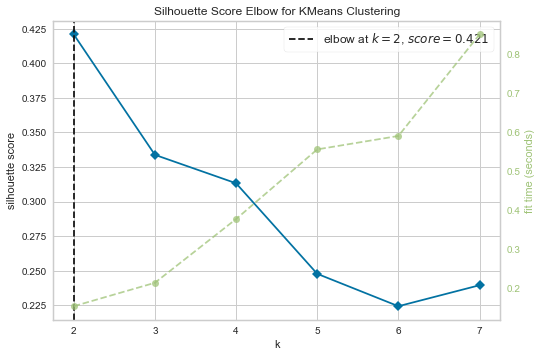

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [18]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(init = "random",)
visualizer = KElbowVisualizer(model, k=(2,8),metric='silhouette', locate_elbow=True)
visualizer.fit(df_vec)
visualizer.show()

Using Silhouette score we can clearly see the optimal clustering number is 2

4. [Density-based Clustering] Perform dimension reduction on your histogram dataset to reduce the
dimension to 2 (similar to Assignment 1 Question 2(e)). Perform DBSCAN on the 2D dataset to obtain
4 to 10 clusters.

In [19]:
pca = PCA(2)
df_trans = pca.fit_transform(df_vec)
df_trans = pd.DataFrame(df_trans)
df_trans.head()

,0,1
0,-161.781802,2064.691774
1,-1444.764539,982.701623
2,-1264.308404,514.686171
3,-2041.086435,237.656028
4,-2078.423877,47.320690


(a) How many clusters did you obtain? What is the Silhouette Coefficient for the clustering you obtain?
What are the eps and min samples parameter values you used to get your clustering? (0.25 point)

In [20]:
db = DBSCAN(eps=500, min_samples=10).fit(df_trans)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
sil_score=silhouette_score(df_trans, db.fit_predict(df_trans))


print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(sil_score)

Estimated number of clusters: 1
Estimated number of noise points: 117
0.5359131850276727


Number of cluster obtained is 1 with 117 as noise with silhoutte score of 0.5359

(b) Plot your clustering result similar to the one shown in https://scikit-learn.org/stable/auto examples/cluster/
plot dbscan.html #sphx-glr-auto-examples-cluster-plot-dbscan-py (0.25 point)

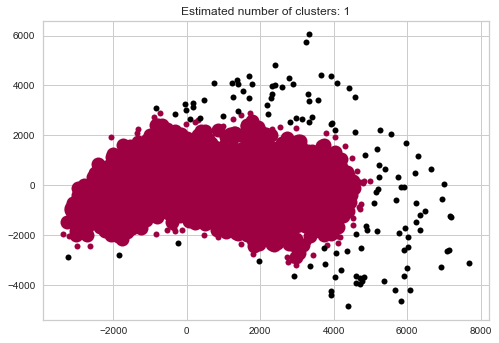

In [21]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = df_trans[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = df_trans[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

5. [Hierarchical Clustering] We will investigate the four different strategies: Single (MIN), Complete
(MAX), Average, and Ward, for agglomerative clustering (i.e., hierarchical clustering) we learned in
the lecture using sklearn.cluster.AgglomerativeClustering with number of clusters set to 4 using the 2D
dataset constructed in Question 4

(a) Use the four linkage values ‘ward’, ‘complete’, ‘average’, ‘single’ for sklearn.cluster.
AgglomerativeClustering to construct 4 clusterings. (1 point)

(b) What are the Silhouette Coefficients for each clustering in (a)? Based on the Silhouette Coefficients,
which strategy performs the best? (0.25 point)

In [22]:
def train_Agglomerative(linkage,X):
    agglo_model = AgglomerativeClustering(linkage=linkage,n_clusters=4)
    y_pred = agglo_model.fit_predict(X)
    print("Agglomerative Clustering : clusters : ",4," linkage : ",linkage," silhouette_score : ",silhouette_score(X,y_pred) )
# Agglomerative clustering
linkage=['complete', 'average', 'single', "ward"]
for lin in linkage:
    train_Agglomerative(lin,df_trans)

Agglomerative Clustering : clusters :  4  linkage :  complete  silhouette_score :  0.3351366513494206
Agglomerative Clustering : clusters :  4  linkage :  average  silhouette_score :  0.4683220737074879
Agglomerative Clustering : clusters :  4  linkage :  single  silhouette_score :  0.5397375356090848
Agglomerative Clustering : clusters :  4  linkage :  ward  silhouette_score :  0.35426535959317657


(c) Plot the four clustering results (separately and label them clearly in your submission) similar to the
one in 4(b) (but no noise point). Based on your observation of the plots, which strategy performs
the best? Is it consistent with the result you obtain in (b)? (0.25 point)

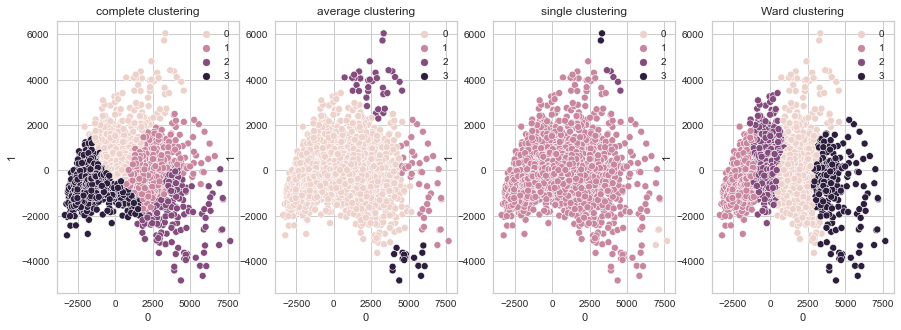

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,5))
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="complete")
clustering_model.fit(df_trans)
labels = clustering_model.labels_

sns.scatterplot(ax=axes[0],data=df_trans, x=0, y=1, hue=clustering_model.labels_).set_title('complete clustering');

clustering_model = AgglomerativeClustering(n_clusters=4, linkage="average")
clustering_model.fit(df_trans)
labels = clustering_model.labels_

sns.scatterplot(ax=axes[1],data=df_trans, x=0, y=1, hue=clustering_model.labels_).set_title('average clustering');

clustering_model = AgglomerativeClustering(n_clusters=4, linkage="single")
clustering_model.fit(df_trans)
labels = clustering_model.labels_

sns.scatterplot(ax=axes[2],data=df_trans, x=0, y=1, hue=clustering_model.labels_).set_title('single clustering');

clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df_trans)
labels = clustering_model.labels_

sns.scatterplot(ax=axes[3],data=df_trans, x=0, y=1, hue=clustering_model.labels_).set_title('Ward clustering');

Using single linkage method we are getting highest silhoutte score which resembles to best clustering